## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme, geom_text

In [ ]:
# Importing the validation set
ha = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
ha

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease
202,Levern Trantow III,35,0,1,138,183,1,182,Disease


In [ ]:
# Checking the value counts of the 'output' variable
ha['diagnosis'].value_counts()

Disease       115
No Disease     89
Name: diagnosis, dtype: int64

In [ ]:
# Defining the response and predictor variables
X = ha[['age', 'chol']]
y = ha['diagnosis']

# Splitting into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fitting the logreg model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
b0_logreg = logreg.intercept_[0]
b1_logreg = logreg.coef_[0][0]
b2_logreg = logreg.coef_[0][1]
print(b0_logreg, b1_logreg, b2_logreg)

-3.3386415336136803 0.04386567284136246 0.003228057345995407


In [ ]:
# For 50% probability
logreg_p50 = np.log(0.5 / (1 - 0.5))
chol_lvl_50 = (logreg_p50 - b0_logreg - b1_logreg * 55) / b2_logreg
print("Cholesterol level for 50% probability:", chol_lvl_50)

Cholesterol level for 50% probability: 286.8689828226064


In [ ]:
# For 90% probability
logreg_p90 = np.log(0.9 / (1 - 0.9))
chol_lvl_90 = (logreg_p90 - b0_logreg - b1_logreg * 55) / b2_logreg
print("Cholesterol level for 90% probability:", chol_lvl_90)

Cholesterol level for 90% probability: 967.5336494717305


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
# Fitting a LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
b0_lda = lda.intercept_[0]
b1_lda, b2_lda = lda.coef_[0]
age = 55
chol_at_boundary = -(b0_lda + b1_lda * age) / b2_lda
print("Cholesterol level at the decision boundary for a 55-year-old:", chol_at_boundary)

Cholesterol level at the decision boundary for a 55-year-old: 288.97197976678086


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
# Defining the hyperparameters
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Defining a linear kernel SVC model
svc = SVC(kernel='linear')

In [ ]:
# Grid search for tuning
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, scoring='accuracy')

In [ ]:
# Best model
best_svc = grid_search.best_estimator_
# Coefficients from the SVC model
b0_svc = best_svc.intercept_[0]
b1_svc = best_svc.coef_[0][0]
b2_svc = best_svc.coef_[0][1]

In [ ]:
# Solving for cholesterol level at decision boundary for a 55-year-old
chol_level_55 = (-b0_svc - b1_svc * 55) / b2_svc

print("Cholesterol level for heart disease prediction:", chol_level_55)

Cholesterol level for heart disease prediction: 250.14017566578826


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

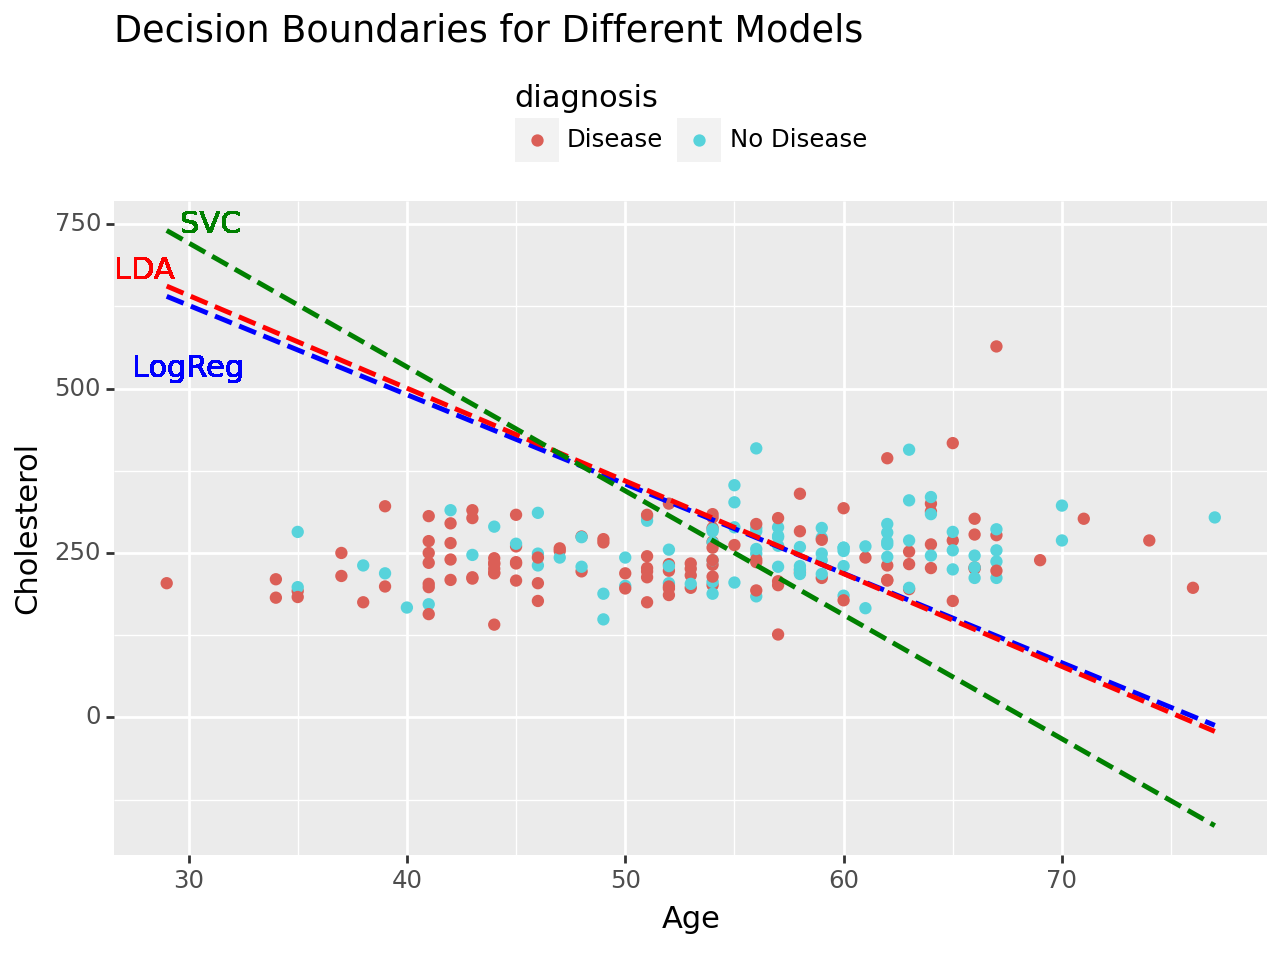

In [ ]:
# Base scatter plot
plot = (ggplot(ha, aes(x='age', y='chol', color='diagnosis')) +
        geom_point() +
        labs(title='Decision Boundaries for Different Models', x='Age', y='Cholesterol') +
        theme(legend_position='top'))

# Age range for plotting decision boundaries
age_range = np.linspace(ha['age'].min(), ha['age'].max(), 100)

# Decision boundary for Logistic Regression
chol_log = (-b0_logreg - b1_logreg * age_range) / b2_logreg
log_reg_line = pd.DataFrame({'age': age_range, 'chol': chol_log})

# Decision boundary for LDA
chol_lda = (-b0_lda - b1_lda * age_range) / b2_lda
lda_line = pd.DataFrame({'age': age_range, 'chol': chol_lda})

# Decision boundary for SVC
chol_svc = (-b0_svc - b1_svc * age_range) / b2_svc
svc_line = pd.DataFrame({'age': age_range, 'chol': chol_svc})

# Adding the decision boundaries with different linetypes
plot += geom_line(data=log_reg_line, linetype='dashed', color='blue', size=1)
plot += geom_line(data=lda_line, linetype='dashed', color='red', size=1)
plot += geom_line(data=svc_line, linetype='dashed', color='green', size=1)

# Adding text labels for the models
plot += geom_text(x=30, y=530, label="LogReg", color="blue")
plot += geom_text(x=28, y=680, label="LDA", color="red")
plot += geom_text(x=31, y=750, label="SVC", color="green")

print(plot)